# Importing Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Analysing Data

In [ ]:
df = pd.read_csv('/content/sample_data/A_Z Handwritten Data.csv')

In [ ]:
df.shape

(18858, 785)

In [ ]:
data_array = np.array(df,dtype=np.uint8)
del df  #memory issues

/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py:2153: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


In [ ]:
data_array.shape

(18858, 785)

In [ ]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [ ]:
labels = data_array[:,0]
# Calculate the correct first dimension for reshape
first_dim = data_array[:,1:].size // (28 * 28)
# Reshape with calculated dimension
x = data_array[:,1:].reshape(first_dim,28,28)/255.
del data_array
unique, counts = np.unique(labels, return_counts=True)
list_alpha = list(zip(alpha, counts))
for i in list_alpha:
    print(i[0],' : ',i[1])

A  :  13869
B  :  4989


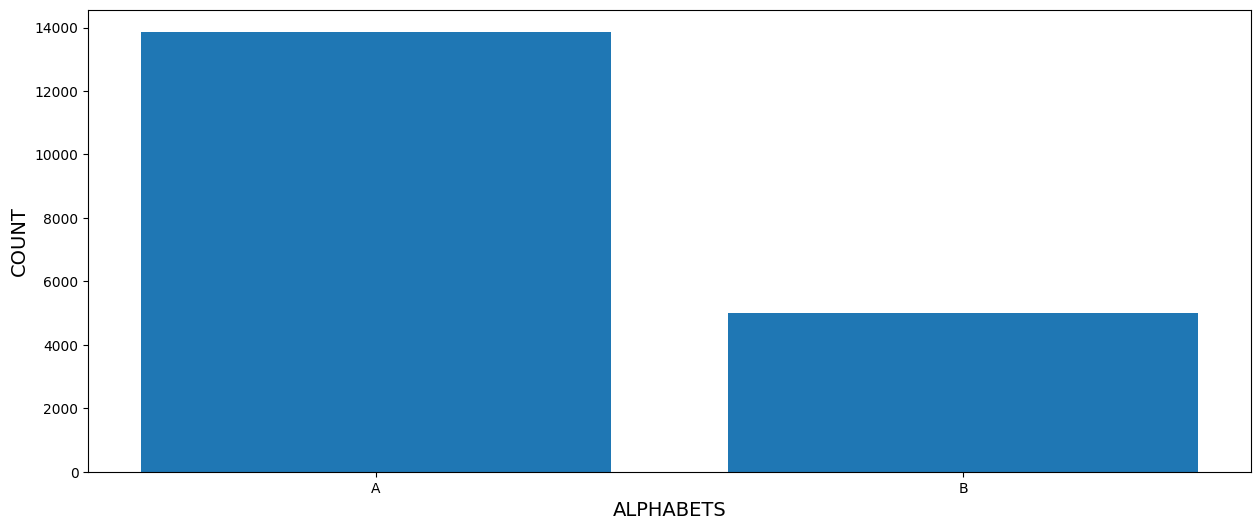

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15, 6))
plt.xlabel('ALPHABETS', fontsize=14)
plt.ylabel('COUNT', fontsize=14)

# Assuming 'list_alpha' contains the alphabet and corresponding counts:
alphabets = [item[0] for item in list_alpha]  # Extract alphabets
counts = [item[1] for item in list_alpha]  # Extract counts

# Now plot with the extracted data
plt.bar(alphabets, counts)
plt.show()

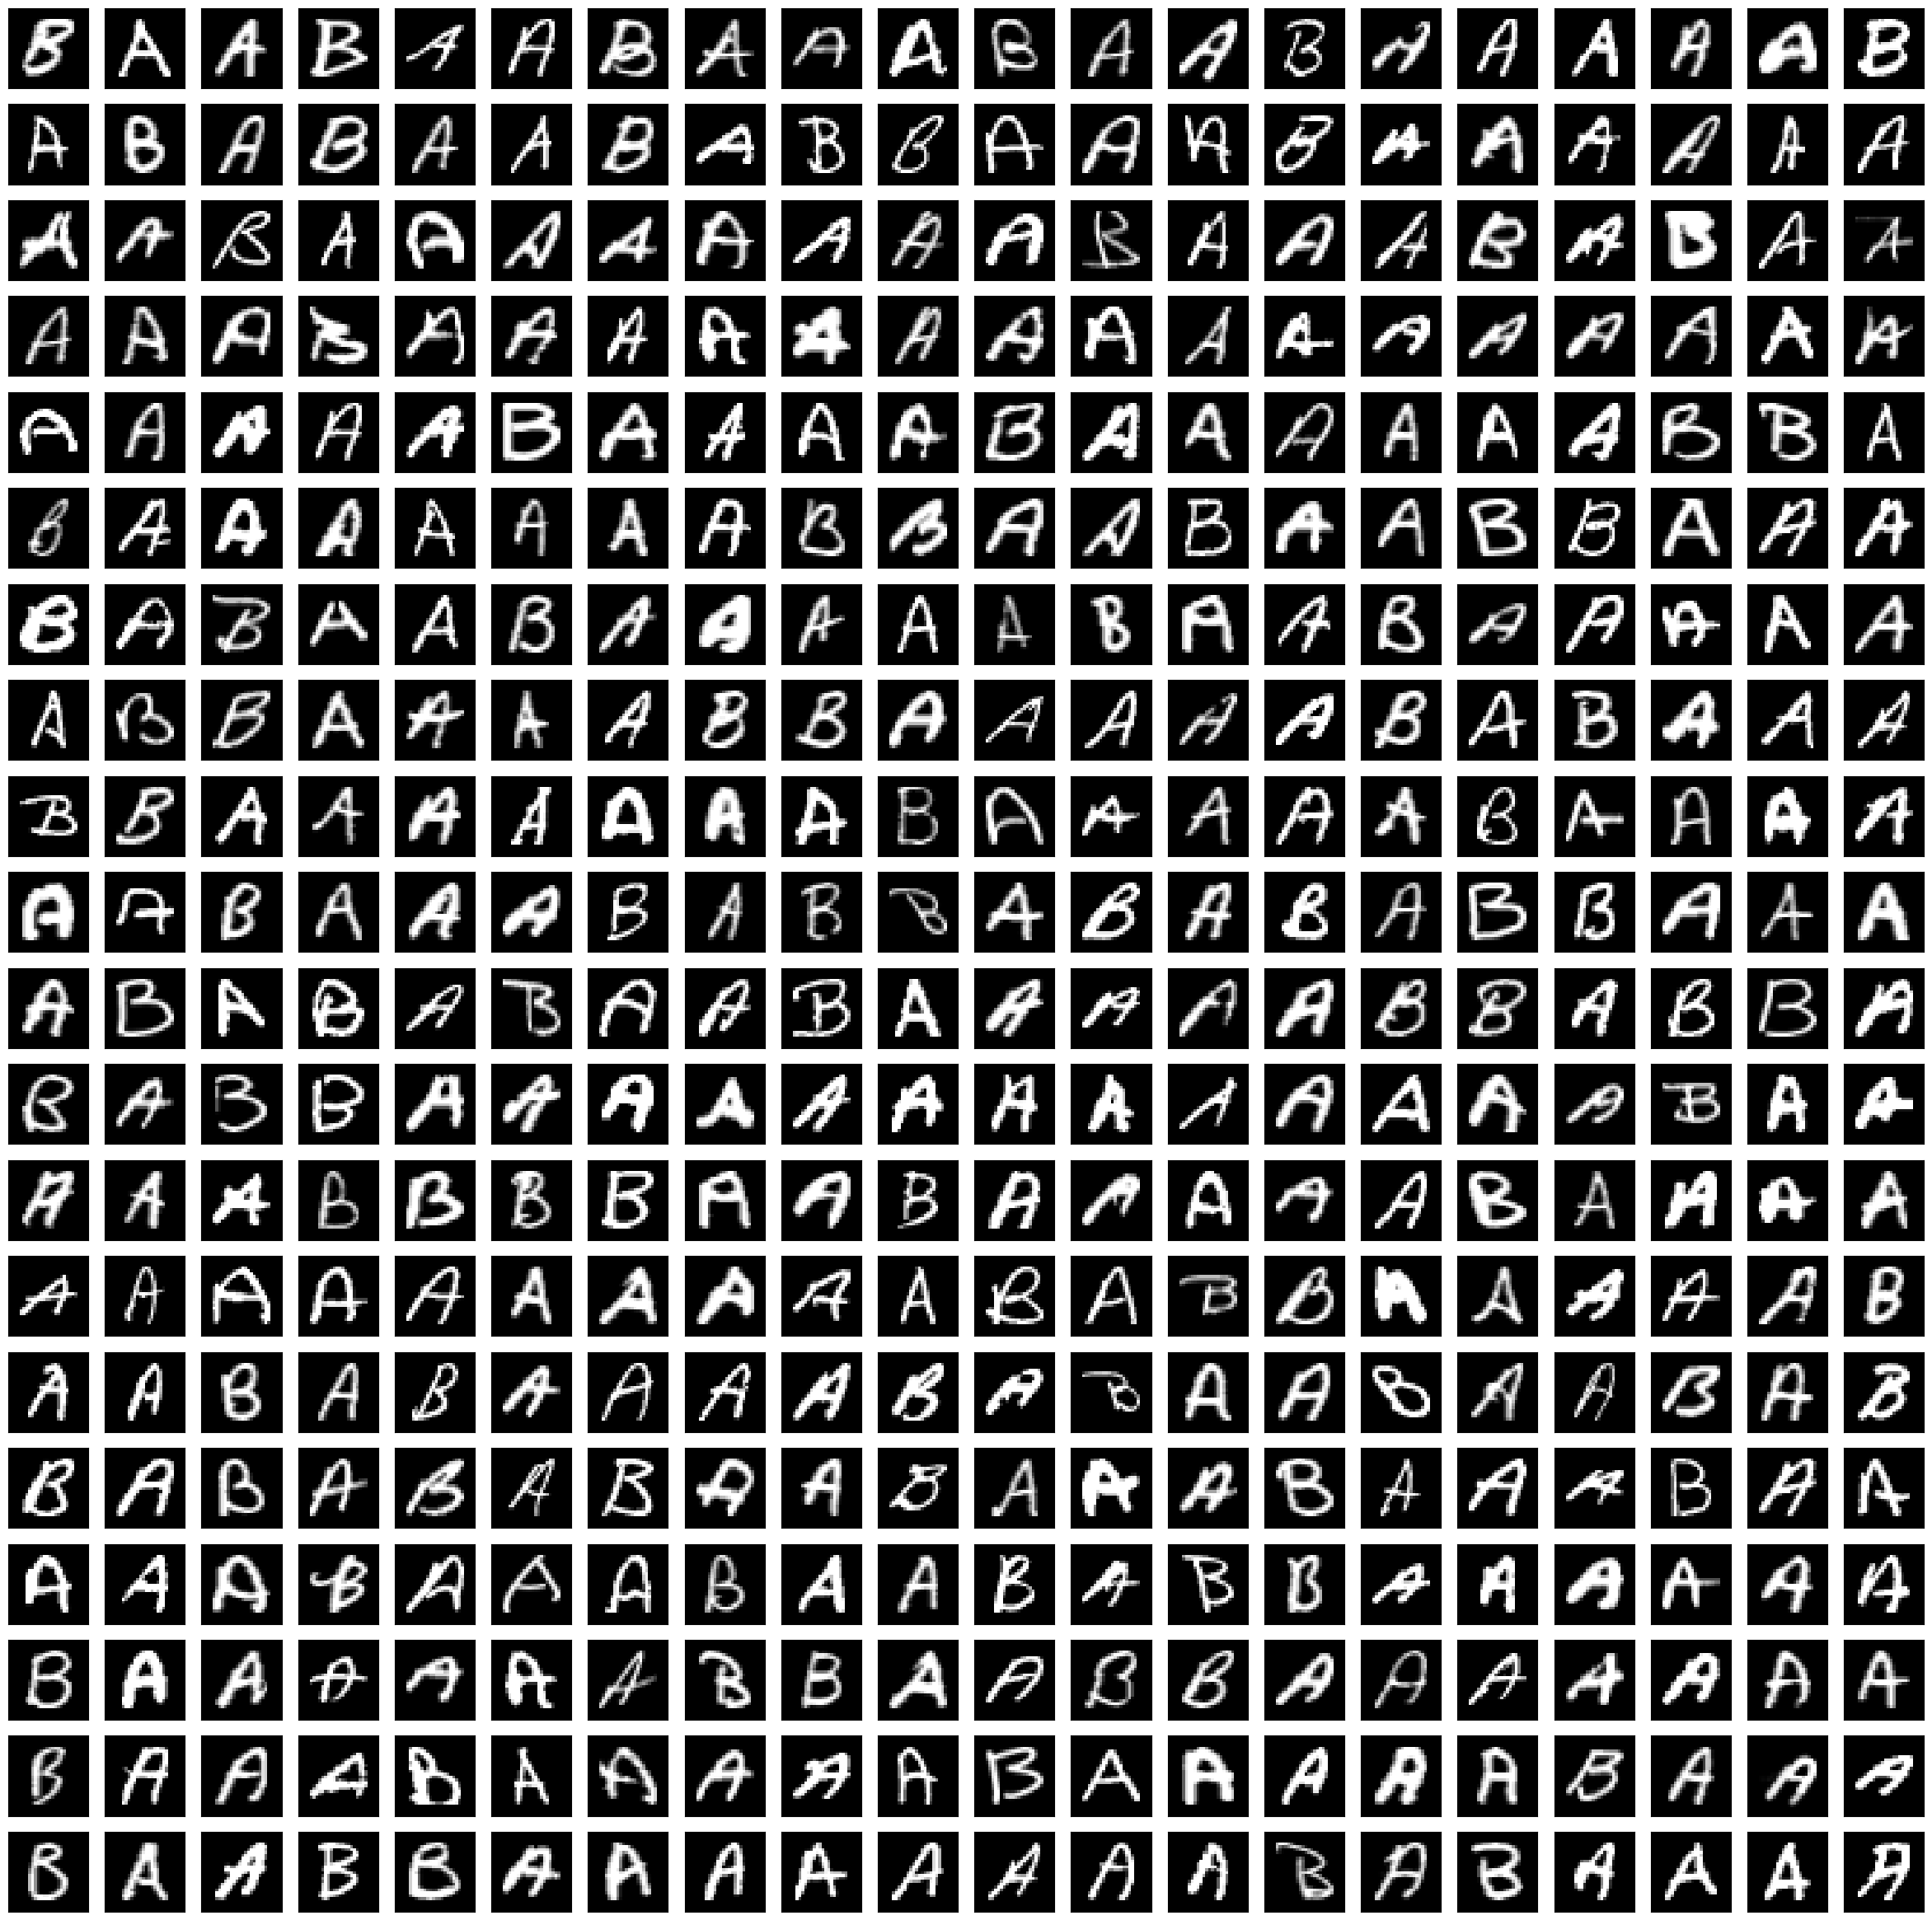

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(30, 30))
c = 1
# Generate random integers within the valid range of x's first dimension
a = np.random.randint(low=0, high=x.shape[0], size=400)
for i in a:
    fig.add_subplot(20, 20, c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[i], cmap='gray')
    c += 1
del a

In [ ]:
del c, list_alpha, counts, unique

# Training and Testing Split

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
# Calculate the correct first dimension for reshaping
new_first_dim = x.size // (28 * 28 * 1)

# Reshape x with the calculated dimension
x = x.reshape(new_first_dim, 28, 28, 1)

# Proceed with train-test split
x_train, x_test, y_train, y_test = tts(x, labels, test_size=0.01)
del x  # memory issues
del labels
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18669, 28, 28, 1)
(189, 28, 28, 1)
(18669,)
(189,)


# Model Building

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense,Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.optimizers import Adadelta
from keras.optimizers import SGD

In [ ]:
model = Sequential([Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1),padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(100,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    Dense(64,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.125),
                    BatchNormalization(),
                    Dense(26,activation='softmax')])

model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 471,294 (1.80 MB)

 Trainable params: 471,038 (1.80 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
history = model.fit(x=x_train,y=y_train,validation_split=0.1,epochs=5)

Epoch 1/5
526/526 ━━━━━━━━━━━━━━━━━━━━ 259s 486ms/step - accuracy: 0.9337 - loss: 0.3098 - val_accuracy: 0.9968 - val_loss: 0.0128
Epoch 2/5
526/526 ━━━━━━━━━━━━━━━━━━━━ 241s 459ms/step - accuracy: 0.9953 - loss: 0.0194 - val_accuracy: 0.9973 - val_loss: 0.0104
Epoch 3/5
526/526 ━━━━━━━━━━━━━━━━━━━━ 237s 451ms/step - accuracy: 0.9963 - loss: 0.0141 - val_accuracy: 0.9968 - val_loss: 0.0135
Epoch 4/5
526/526 ━━━━━━━━━━━━━━━━━━━━ 262s 451ms/step - accuracy: 0.9973 - loss: 0.0115 - val_accuracy: 0.9989 - val_loss: 0.0034
Epoch 5/5
526/526 ━━━━━━━━━━━━━━━━━━━━ 263s 453ms/step - accuracy: 0.9985 - loss: 0.0057 - val_accuracy: 0.9989 - val_loss: 0.0046


In [ ]:
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
accuracy=history.history['accuracy']

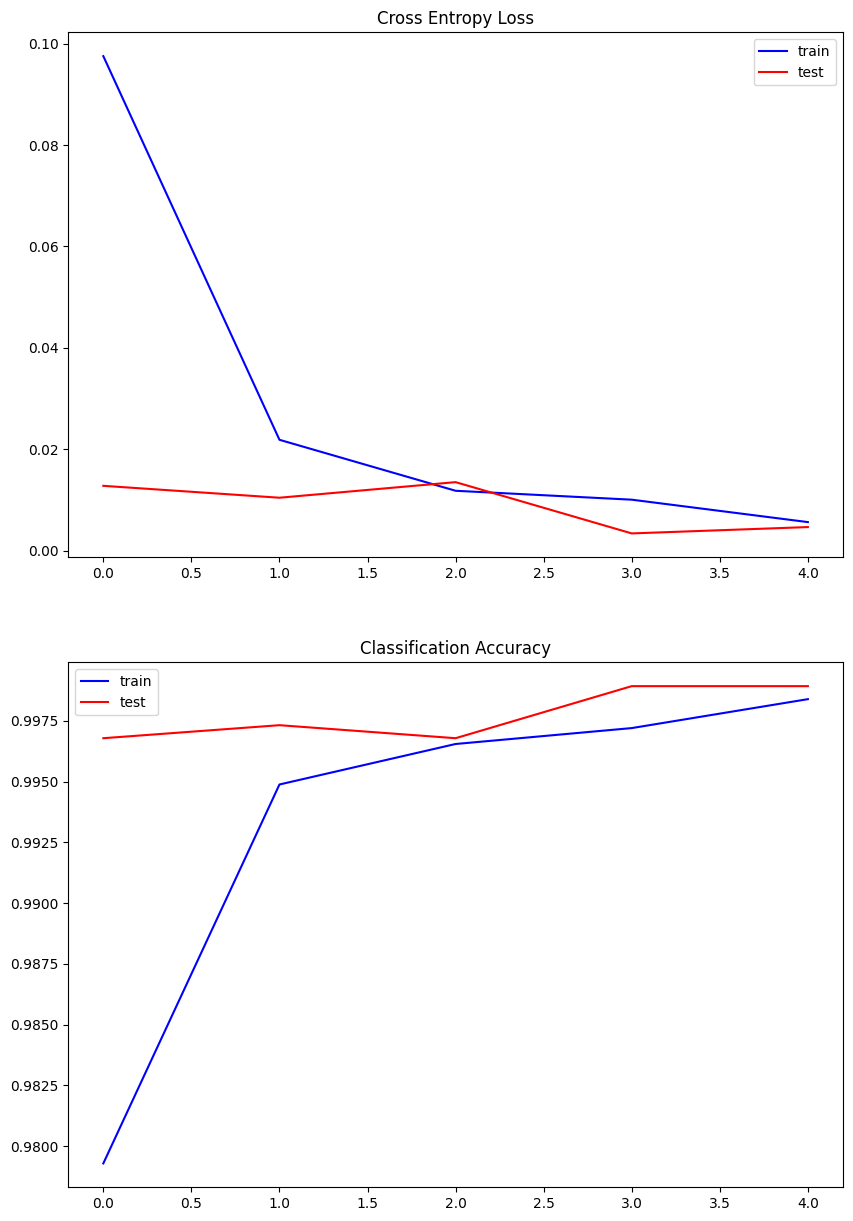

In [ ]:
fig=plt.figure(figsize=(10,15))
fig.add_subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(loss, color='blue', label='train')
plt.plot(val_loss, color='red', label='test')
plt.legend()
# plot accuracy
fig.add_subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(accuracy, color='blue', label='train')
plt.plot(val_accuracy, color='red', label='test')
plt.legend()

In [ ]:
metrics=model.evaluate(x_test,y_test)
metrics
print("Test Acuracy is : {:.2f}".format(metrics[1]*100))
print("Test Loss is : {:.2f}".format(metrics[0]))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 1.0000 - loss: 2.7686e-04
Test Acuracy is : 100.00
Test Loss is : 0.00


In [ ]:
model.save('Alphabet_Recognition.keras')

In [ ]:
model=tf.keras.models.load_model('Alphabet_Recognition.keras')

In [ ]:
metrics= model.evaluate(x_test,y_test)
print(metrics)
print("Test Acuracy is : {:.2f}".format(metrics[1]*100))
print("Test Loss is : {:.2f}".format(metrics[0]))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 1.0000 - loss: 2.7686e-04
[0.00024547838256694376, 1.0]
Test Acuracy is : 100.00
Test Loss is : 0.00


# Evaluating On Test Dataset

In [ ]:
def test_images(n=225):
    # Get the shape of x_test to determine the upper bound for random index generation
    x_test_shape = x_test.shape[0]
    index = np.random.randint(low=0, high=x_test_shape, size=n)  # Use x_test_shape as the upper bound
    fig = plt.figure(figsize=(30, 40))
    for i in range(n):
        [pred] = model.predict(x_test[index[i]].reshape(1, 28, 28, 1))
        pred = np.argmax(pred)
        actual = y_test[index[i]]
        fig.add_subplot(15, 15, i + 1)
        plt.xticks([])
        plt.yticks([])
        if actual == pred:
            plt.title(alpha[pred], color='green', fontsize=25, fontweight="bold")
        else:
            plt.title(alpha[pred], color='red', fontsize=25, fontweight="bold")
        plt.imshow(x_test[index[i]].reshape(28, 28), cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━

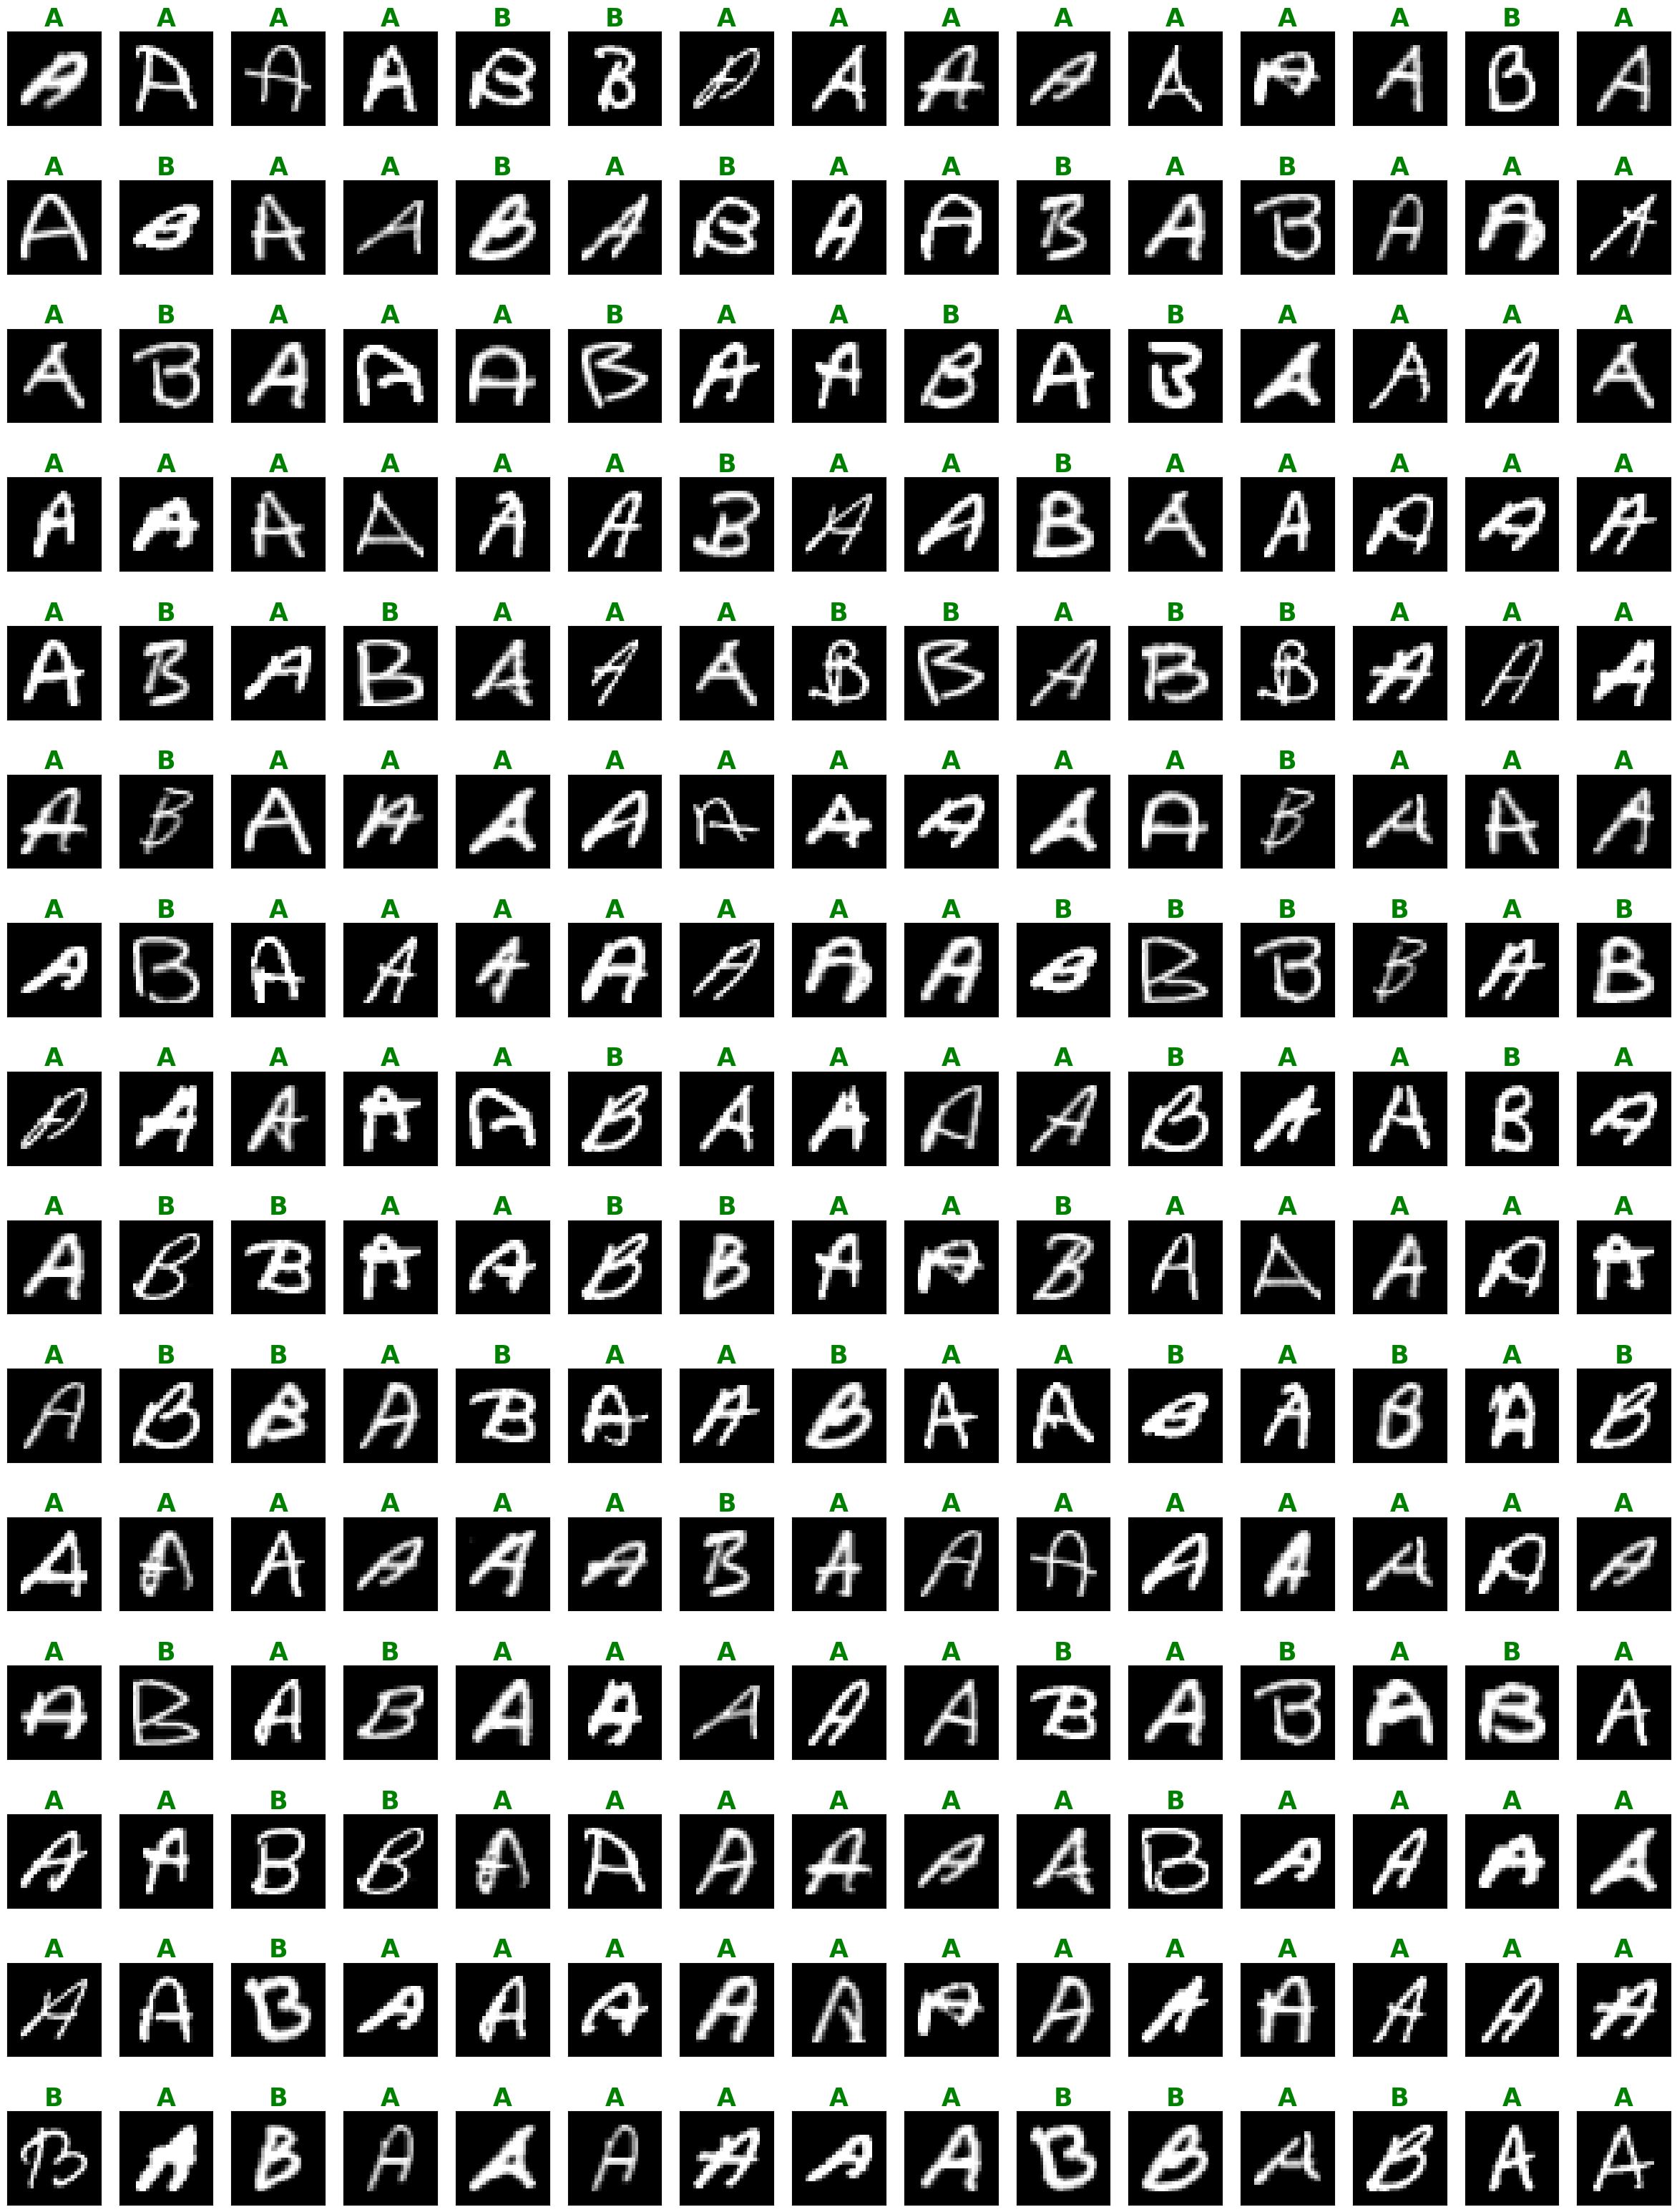

In [ ]:
test_images()

# Test your Image

In [ ]:
import cv2

In [ ]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [ ]:
def alphabet_recognize(filepath):
    image = cv2.imread(filepath)
    blur_image=cv2.medianBlur(image,7)

    grey = cv2.cvtColor(blur_image, cv2.COLOR_BGR2GRAY)

    thresh = cv2.adaptiveThreshold(grey,200,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,41,25)

    contours,hierarchy= cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    preprocessed_digits = []

    # initialize the reverse flag and sort index
    # handle if we need to sort in reverse
    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),
                                    key=lambda b:b[1][0], reverse=False))


    for c in contours:
        x,y,w,h = cv2.boundingRect(c)

        # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
        cv2.rectangle(blur_image, (x,y), (x+w, y+h), color=(255, 0, 0), thickness=2)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = thresh[y:y+h, x:x+w]

        # Resizing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (18,18))

        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

        # Adding the preprocessed digit to the list of preprocessed digits
        preprocessed_digits.append(padded_digit)
    plt.xticks([])
    plt.yticks([])
    plt.title("Contoured Image",color='red')
    plt.imshow(image, cmap="gray")
    plt.show()

    inp = np.array(preprocessed_digits)
    figr=plt.figure(figsize=(len(inp),4))
    i=1
    alphabets=[]
    for digit in preprocessed_digits:
        [prediction] = model.predict(digit.reshape(1, 28, 28, 1)/255.)
        pred=alpha[np.argmax(prediction)]
        alphabets.append(pred)
        figr.add_subplot(1,len(inp),i)
        i+=1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(digit.reshape(28, 28), cmap="gray")
        plt.title(pred,color='green',fontsize=18,fontweight="bold")
    print("The Recognized Alphabets are : " ,*alphabets)

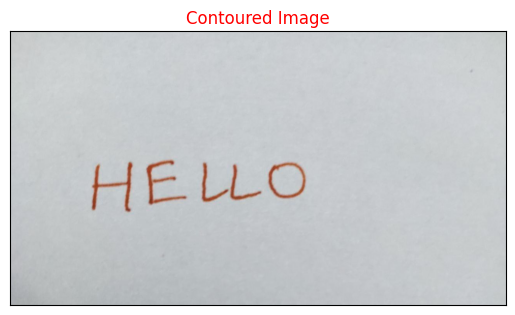

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The Recognized Alphabets are :  A B B B B


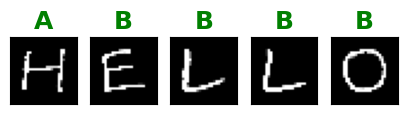

In [ ]:
alphabet_recognize('/content/sample_data/1.jpg')

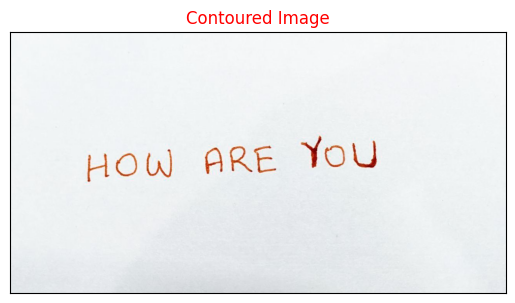

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The Recognized Alphabets are :  A B A A A B B B B


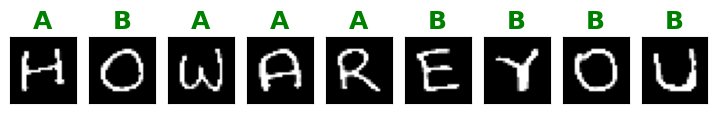

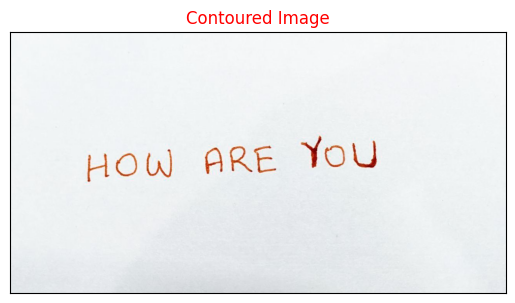

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [ ]:
alphabet_recognize('/content/sample_data/2.jpg')

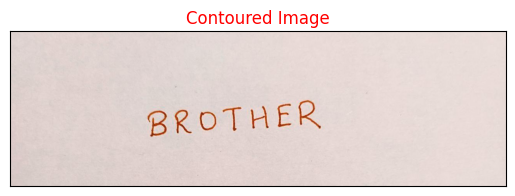

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The Recognized Alphabets are :  B B B B A B A


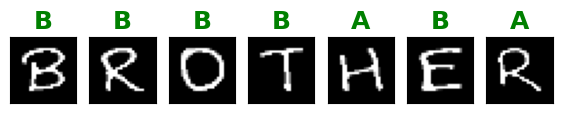

In [ ]:
alphabet_recognize('/content/sample_data/5.jpg')

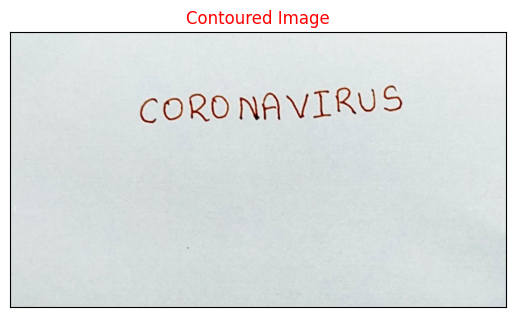

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The Recognized Alphabets are :  B B B B A A B B A B B


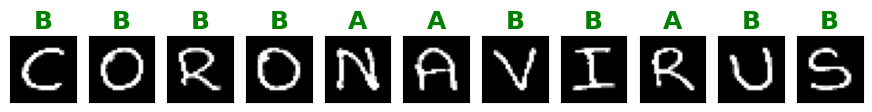

In [ ]:
alphabet_recognize('/content/sample_data/6.jpg')

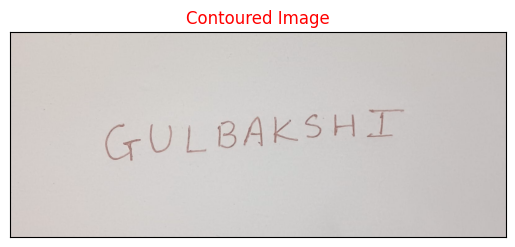

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The Recognized Alphabets are :  B B B B A B B A B B A A B


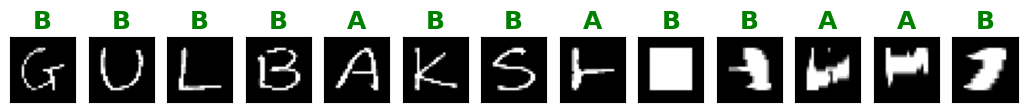

In [ ]:
alphabet_recognize('/content/sample_data/7.jpg')

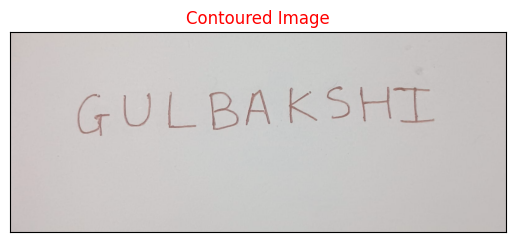

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The Recognized Alphabets are :  B B B B A A B B A B


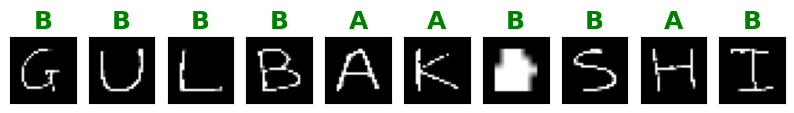

In [ ]:
alphabet_recognize('/content/sample_data/77.jpg')

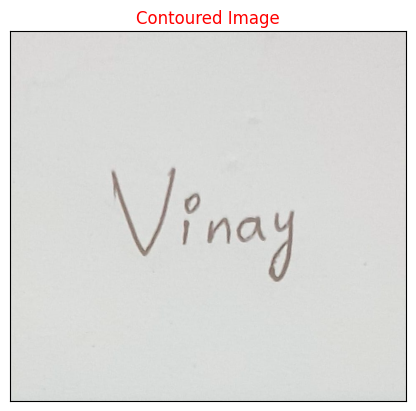

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The Recognized Alphabets are :  B B B A B B B


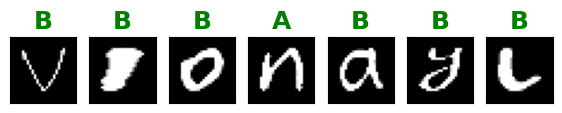

In [ ]:
alphabet_recognize('/content/sample_data/777.jpg')

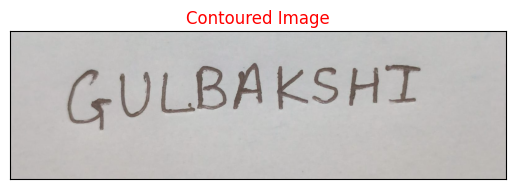

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The Recognized Alphabets are :  A A B B B A A B A B


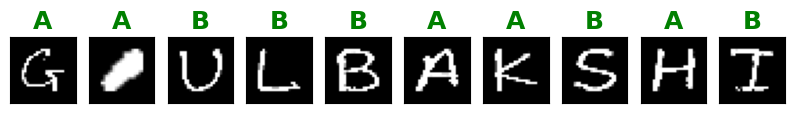

In [ ]:
alphabet_recognize('/content/sample_data/7777.jpg')